### • Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### • Reading the .csv file

In [2]:
df = pd.read_csv("Condominium.csv", sep=';', decimal=',')

print(df.shape)

display(df.head())

(60, 22)


,Data,Saldo,Receitas,Total de Despesas,Despesas Gerais,Despesas Administrativas,Valores em débito,n° de mensalidades de condôminos em débito,Energia,Uber,...,Manutenção geral (outros),Limpeza do condomínio,Manutenção do sistema hidráulico de abastecimento,Ocorrência da manutenção do sistema hidráulico,Pagamento do guarita,Contadora,ISS,Tarifas do SICOOB,Seguro do condomínio,Mio Telecom
0,31/01/2019,1.03,6544.99,14128.00,596.96,499.40,146.0,1.0,270.74,58.53,...,220.00,540.0,NaN,Não,Sim,350.0,17.5,131.90,0.0,0.0
1,28/02/2019,63.86,2491.62,2428.79,805.15,473.70,438.0,3.0,225.15,50.00,...,250.00,225.0,NaN,Não,Sim,350.0,17.5,106.20,0.0,0.0
2,26/03/2019,1062.85,3084.46,2085.47,1074.81,538.55,292.0,2.0,246.82,34.00,...,246.00,540.0,NaN,Não,Sim,350.0,17.5,171.05,0.0,0.0
3,30/04/2019,836.66,2971.30,3197.49,1740.35,481.04,292.0,2.0,269.85,20.00,...,1129.85,585.0,NaN,Não,Sim,350.0,17.5,113.54,0.0,0.0
4,31/05/2019,120.40,2785.74,3502.00,2228.42,479.97,292.0,2.0,276.60,20.00,...,980.00,550.0,NaN,Não,Sim,350.0,17.5,112.47,0.0,0.0


### • Data processing 
(The dataset has some unnecessary columns, wrong data types, bad data formatting and some rows with no data. Let's fix this!)

In [3]:
df = df.drop(columns=['Ocorrência da manutenção do sistema hidráulico', 'Pagamento do guarita'])

df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, format='%d/%m/%Y')
df['Year'] = df['Data'].dt.year
df['Month'] = df['Data'].dt.month

df.columns = df.columns.str.strip()

columns_NaN = ['Material de construção', 'Material de limpeza', 'Manutenção geral (outros)', 'Manutenção do sistema hidráulico de abastecimento']

df[columns_NaN] = df[columns_NaN].fillna(0)

### • Time Series Graph - Condominium balance

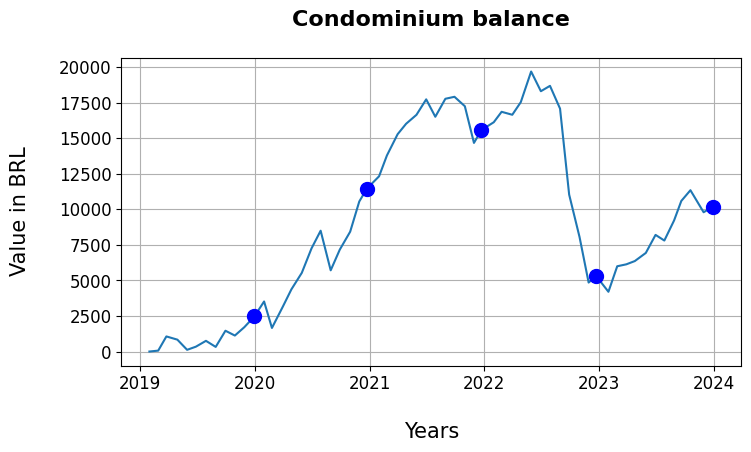

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(df['Data'], df['Saldo'])
year_turn_dates = df[df['Data'].dt.month == 12]['Data'].tolist()
plt.scatter(year_turn_dates, df[df['Data'].dt.month == 12]['Saldo'], color='blue', s=100, zorder=5)
plt.title("Condominium balance\n", fontsize=16, fontweight='bold')
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Value in BRL\n", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

### • Stacked Bar Chart - Balance by months from 2019 to 2023

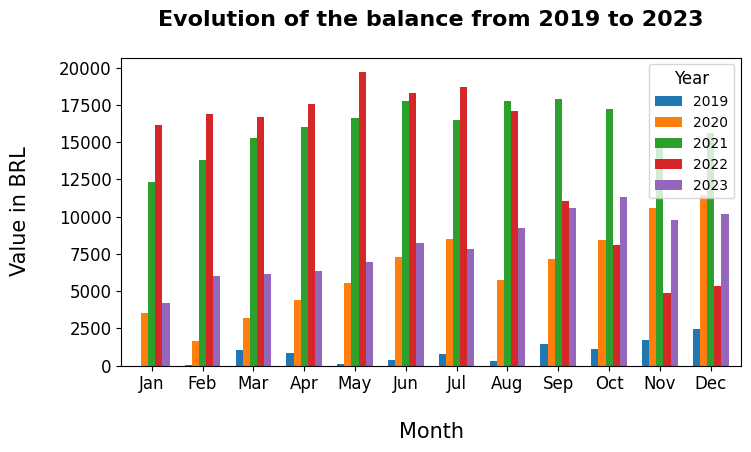

In [5]:
sum_monthly_expenses_over_years = df.groupby(['Year', 'Month'])['Saldo'].sum().unstack(level=0)

months_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = sum_monthly_expenses_over_years.plot(kind='bar', figsize=(8, 4), width=0.7)
ax.set_title("Evolution of the balance from 2019 to 2023\n", fontsize=16, fontweight='bold')
ax.set_xlabel("\nMonth", fontsize=15)
ax.set_ylabel("Value in BRL\n", fontsize=15)
ax.legend(title='Year', title_fontsize=12, fontsize=10)
ax.set_xticklabels(months_name, rotation=0)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.show()

### • Time Series Chart - Total Expenses | General Expenses | Administrative Expenses

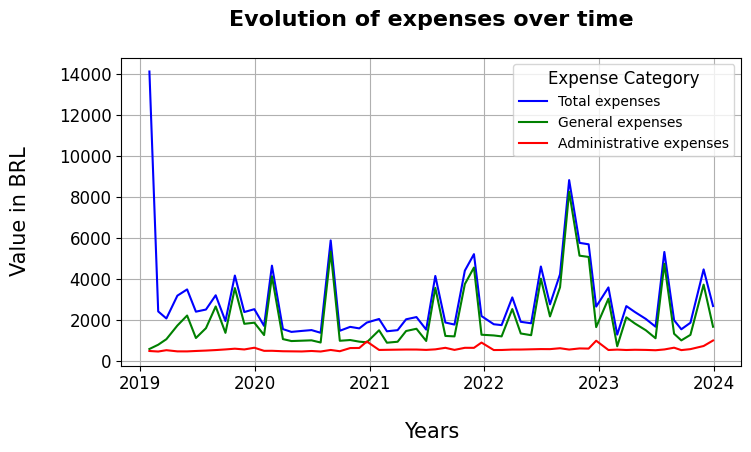

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(df['Data'], df['Total de Despesas'], label='Total expenses', color='blue')
plt.plot(df['Data'], df['Despesas Gerais'], label='General expenses', color='green')
plt.plot(df['Data'], df['Despesas Administrativas'], label='Administrative expenses', color='red')
plt.title("Evolution of expenses over time\n", fontsize=16, fontweight='bold')
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Value in BRL\n", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Expense Category', title_fontsize=12, fontsize=10)
plt.grid(True)
plt.show()

### • Time Series Chart - General Expenses

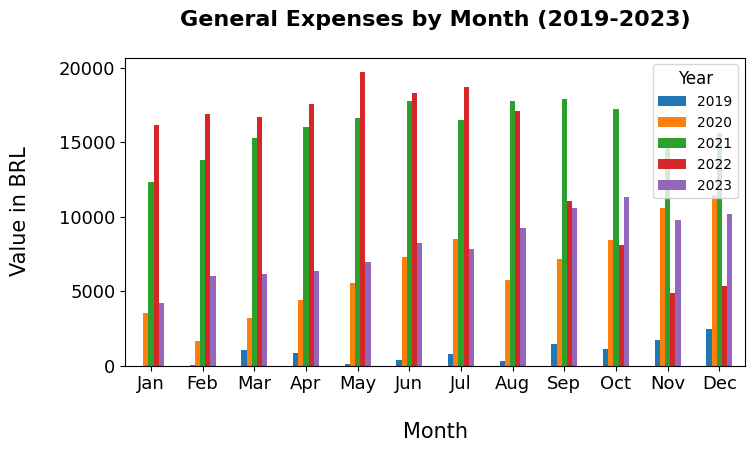

In [7]:
ax = sum_monthly_expenses_over_years.plot(kind='bar', figsize=(8, 4))
ax.set_title("General Expenses by Month (2019-2023)\n", fontsize=16, fontweight='bold')
ax.set_xlabel("\nMonth", fontsize=15)
ax.set_ylabel("Value in BRL\n", fontsize=15)
ax.legend(title='Year', title_fontsize=12, fontsize=10)
ax.set_xticklabels(months_name, rotation=0)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.show()


### • Stacked Bar Chart - Administrative expenses

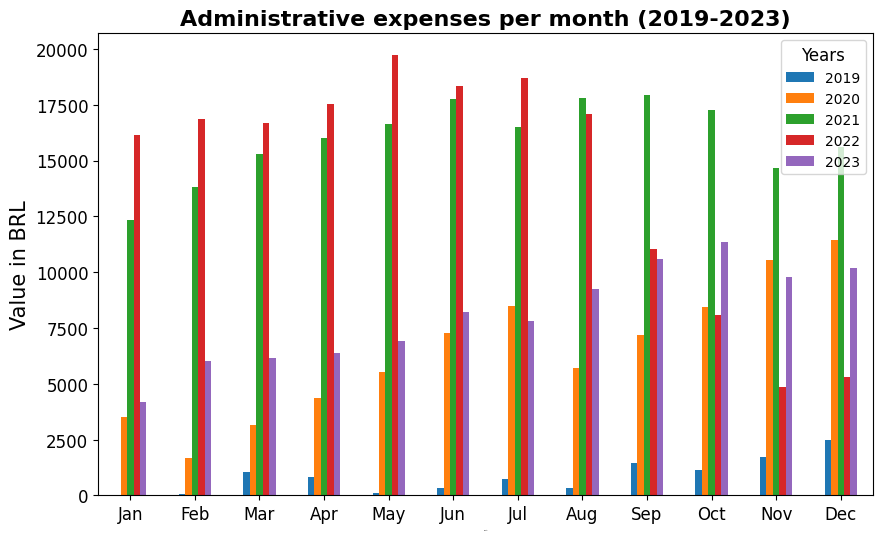

In [8]:
ax = sum_monthly_expenses_over_years.plot(kind='bar', figsize=(10, 6))
ax.set_title("Administrative expenses per month (2019-2023)", fontsize=16, fontweight='bold')
ax.set_xlabel("Month", fontsize=1)
ax.set_ylabel("Value in BRL", fontsize=15)
ax.legend(title='Years', title_fontsize=12, fontsize=10)
ax.set_xticklabels(months_name, rotation=0)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.show()


### • Pie Chart - General Expenses

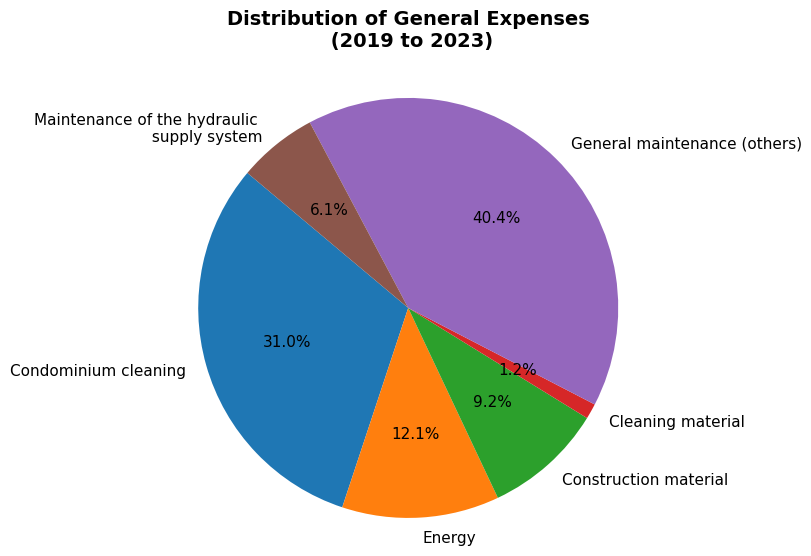

In [9]:
columns_general_expenses = ['Limpeza do condomínio', 'Energia', 'Material de construção', 'Material de limpeza', 'Manutenção geral (outros)','Manutenção do sistema hidráulico de abastecimento']
sum_of_general_expenses = df[columns_general_expenses].sum()
labels = ['Condominium cleaning', 'Energy', 'Construction material', 'Cleaning material', 'General maintenance (others)', 'Maintenance of the hydraulic \n supply system']

plt.figure(figsize=(8, 6))
plt.pie(sum_of_general_expenses, labels=labels, autopct='%1.1f%%', startangle=140, textprops={"fontsize":11})
plt.title('Distribution of General Expenses\n (2019 to 2023)\n', fontsize=14, fontweight = 'bold')
plt.axis('equal')
plt.show()

### • Gráfico de setores - Despesas Administrativas

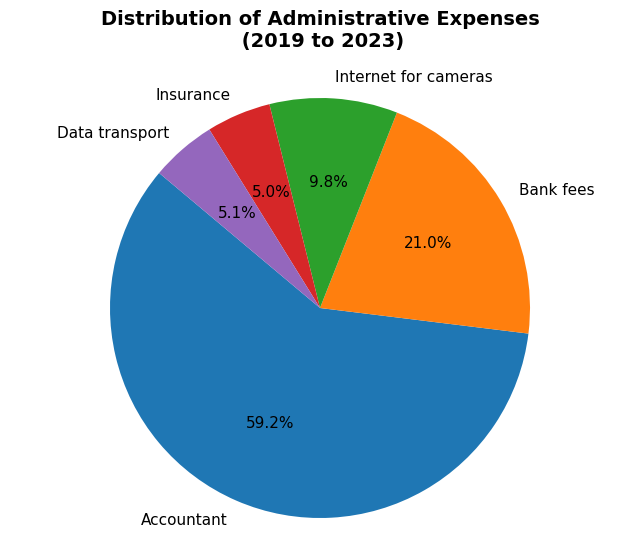

In [10]:
columns_administrative_expenses = ['Contadora', 'Tarifas do SICOOB', 'Mio Telecom', 'Seguro do condomínio', 'Uber']
sum_of_administrative_expenses = df[columns_administrative_expenses].sum()
labels = ['Accountant', 'Bank fees', 'Internet for cameras', 'Insurance', 'Data transport']

plt.figure(figsize=(8, 6))
plt.pie(sum_of_administrative_expenses, labels=labels, autopct='%1.1f%%', startangle=140, textprops={"fontsize":11})
plt.title('Distribution of Administrative Expenses\n (2019 to 2023)\n', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

### • Table with all expenses per year

In [11]:

columns_numeric = [
    'Saldo', 'Receitas', 'Total de Despesas', 'Despesas Gerais', 'Despesas Administrativas', 'Valores em débito', 
    'Energia', 'Uber', 'Material de construção', 'Material de limpeza', 'Manutenção geral (outros)', 
    'Limpeza do condomínio', 'Manutenção do sistema hidráulico de abastecimento', 'Contadora', 'ISS', 'Tarifas do SICOOB', 
    'Seguro do condomínio', 'Mio Telecom'
]

df_sum = df.groupby('Year')[columns_numeric].sum()

display(df_sum.iloc[:,1:7])
display(df_sum.iloc[:,7:12])
display(df_sum.iloc[:,12:16])

,Receitas,Total de Despesas,Despesas Gerais,Despesas Administrativas,Valores em débito,Energia
Year,,,,,,
2019,39458.37,44574.03,20519.43,6458.54,5548.0,3171.63
2020,35280.61,26307.97,19668.11,6726.93,7592.0,2944.45
2021,33585.19,30454.63,23059.29,7372.47,7154.0,3211.77
2022,34666.73,45063.26,37618.99,7443.49,13727.0,3009.58
2023,36556.95,31671.24,24210.37,7432.88,13871.0,2692.70


,Uber,Material de construção,Material de limpeza,Manutenção geral (outros),Limpeza do condomínio
Year,,,,,
2019,322.53,3269.13,179.65,7555.85,6390.0
2020,401.90,555.55,294.05,4377.20,7160.0
2021,350.00,2018.09,285.88,6978.30,7802.0
2022,360.00,2681.85,467.25,22372.18,8018.0
2023,360.00,2888.95,245.11,8834.24,9146.6


,Manutenção do sistema hidráulico de abastecimento,Contadora,ISS,Tarifas do SICOOB
Year,,,,
2019,999.5,4200.0,210.28,1659.14
2020,500.0,4200.0,210.14,1465.87
2021,500.0,4200.0,210.00,1494.85
2022,2480.0,4200.0,210.00,1433.69
2023,3120.0,4200.0,210.00,1391.36
